In [2]:
from tdmclient import ClientAsync
from local_navigation import localNavigation
from global_navigation import GlobalNavigation
from Vision import Vision
import time
from motion_control import MotionControl
from robot_api import Thymio
from global_navigation import GlobalNavigation
import numpy as np

client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 6ca1ca45-4524-41eb-8cc4-fb023f64b9d0

In [3]:
# await node.unlock()

In [4]:
#create vision module object
visio = Vision()
visio.begin()

Caméra initialisée sur le port 0


In [5]:
# visio.stop() #stop the visio module
# t, g, o = visio.get_thymio_goal_and_obstacles() #get the lists you need
# print(o)
# print(g)
# print(t)

In [6]:
"""Point d'entrée principal"""
global_nav = GlobalNavigation()
Thymio = Thymio(node, client)
motion_control = MotionControl(Thymio)
local_navigation = localNavigation()



No path
No path
No path


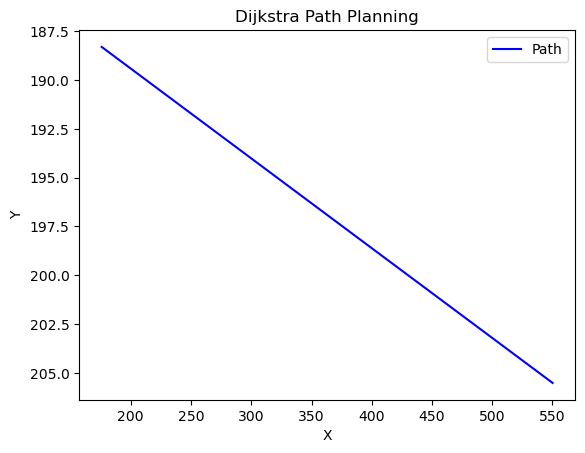

Thymio not detected


In [10]:
thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()


path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
if path:
    global_nav.plot_path(path, obstacles)
    visio.camera_feed.analysis.path = path.copy()

else:
    print("No valid path found. Cannot plot.")

In [8]:
# print(path)

In [ ]:
path.pop(0)
goal_point = path[0]
glob_loc = 0
speed = [0,0]

try:
    while True:
        prox_horizontal = motion_control.read_prox_sensors()
        glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
        #print(prox_horizontal)
       
        if(glob_loc == 0):
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if motion_control.path_tracking(thymio, goal_point):
                path.pop(0)
                if not path:
                    motion_control.set_motor_speed(0, 0)
                    break
                else:
                    goal_point = path[0]
            thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
        if(glob_loc == 1):
            y = motion_control.get_motor_speed()
            speed = local_navigation.reactive_control(prox_horizontal, y)
            motion_control.set_motor_speed(speed[0], speed[1])
            glob_loc = local_navigation.global_to_local(prox_horizontal, glob_loc)
            if(glob_loc == 0):
                thymio, goal, obstacles = visio.get_thymio_goal_and_obstacles()
                path, _, _ = global_nav.dijkstra(thymio, goal, obstacles)
    print("ARRIVED")



except KeyboardInterrupt:
    print("Stop the program")
finally:
    visio.stop()
    print("Program stops")

theta =  2.3561945
alpha =  0.7394496167893618
vitesse lineaire de base  7492.79106743967
distance du but 374.6395533719835
theta =  2.3305593
alpha =  0.7649717523895037
vitesse lineaire de base  7471.647948944881
distance du but 373.58239744724403
Thymio not detected
theta =  2.3561945
alpha =  0.742223471264909
vitesse lineaire de base  7449.837877581072
distance du but 372.4918938790536
theta =  2.406153
alpha =  0.7052297532801681
vitesse lineaire de base  7366.620558996882
distance du but 368.3310279498441
theta =  2.4558632
alpha =  0.6659185150863793
vitesse lineaire de base  7264.052374371537
distance du but 363.20261871857684
theta =  2.5252957
alpha =  0.6129668045545631
vitesse lineaire de base  7148.486902745324
distance du but 357.4243451372662
theta =  2.5535903
alpha =  0.5917325606123853
vitesse lineaire de base  7100.89534965427
distance du but 355.0447674827135
theta =  2.5722795
alpha =  0.5860694354101286
vitesse lineaire de base  6961.262883479662
distance du but 

In [ ]:
motion_control.set_motor_speed(0, 0)
#test

NameError: name 'motion_control' is not defined

In [ ]:
prox_horizontal = motion_control.read_prox_sensors()
print(prox_horizontal)

[0, 0, 0, 0, 0, 0, 0]
